In [1]:
import pandas as pd
import datetime as dt
from datetime import timedelta, date
from datetime import datetime

In [2]:
import pandas as pd
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [19]:
data_yh

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,88.339996,92.110001,87.650002,90.470001,90.470001,1286000
1,2019-01-03,88.980003,89.910004,84.269997,84.580002,84.580002,2054000
2,2019-01-04,87.309998,90.900002,86.660004,90.059998,90.059998,2165400
3,2019-01-07,90.959999,98.360001,90.379997,95.550003,95.550003,1937800
4,2019-01-08,97.820000,98.820000,94.169998,96.760002,96.760002,1447600
...,...,...,...,...,...,...,...
452,2020-10-16,300.000000,304.225006,295.640015,297.079987,297.079987,1543200
453,2020-10-19,300.250000,308.769989,297.570007,299.950012,299.950012,2036900
454,2020-10-20,300.950012,304.980011,293.239990,294.540009,294.540009,1732500
455,2020-10-21,297.809998,297.880005,270.230011,270.269989,270.269989,2306400


In [3]:
data_yh = pd.read_csv("raw_data/W_2020-10-23.csv")

In [4]:
df = data_yh[['Date', 'Open', 'Close', 'Low', 'High']]

In [5]:
df=df.rename(columns={'Date': 'ds', 'Open': 'y', 'Close': 'close', 'Low': 'low', 'High': 'high'})

In [9]:
df.head()

,ds,y,close,low,high
0,2019-01-02,88.339996,90.470001,87.650002,92.110001
1,2019-01-03,88.980003,84.580002,84.269997,89.910004
2,2019-01-04,87.309998,90.059998,86.660004,90.900002
3,2019-01-07,90.959999,95.550003,90.379997,98.360001
4,2019-01-08,97.820000,96.760002,94.169998,98.820000


In [10]:
df.shape

(457, 5)

In [11]:
df_test = df[400:]
df_test = df_test.reset_index()
df_train = df[0:400]

In [12]:
m = Prophet()
m.add_regressor('close')
m.add_regressor('low')
m.add_regressor('high')
m.fit(df_train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/ps306w/venvs/seeking_sigma/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.4936


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1739.9    0.00711213       2203.85      0.9336      0.9336      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1759.7   0.000850176       377.799           1           1      223   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1766.32     0.0020315       678.315           1           1      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1768.51   0.000272404       194.103       1.883      0.1883      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1769.67   0.000640712       438.246           1           1      574   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [47]:
future = m.make_future_dataframe(periods=90)
future.tail()
future.shape


(770, 1)

In [48]:
df.shape

(680, 5)

In [13]:
forecast = m.predict(df_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/Users/ps306w/venvs/seeking_sigma/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/ps306w/venvs/seeking_sigma/lib/python3.9/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
52,2020-10-16,302.849614,300.399876,305.449611
53,2020-10-19,306.021515,303.579280,308.371929
54,2020-10-20,303.305867,300.794678,305.729009
55,2020-10-21,292.958567,290.365267,295.521030
56,2020-10-22,270.860362,268.500990,273.503728


In [56]:
forecast.shape

(72, 31)

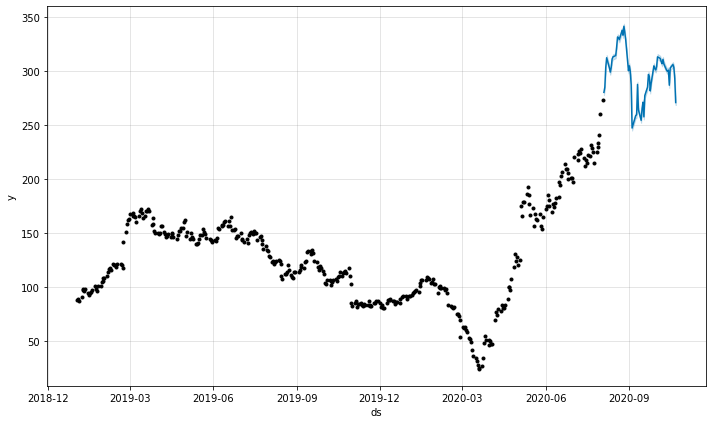

In [14]:
fig1 = m.plot(forecast)

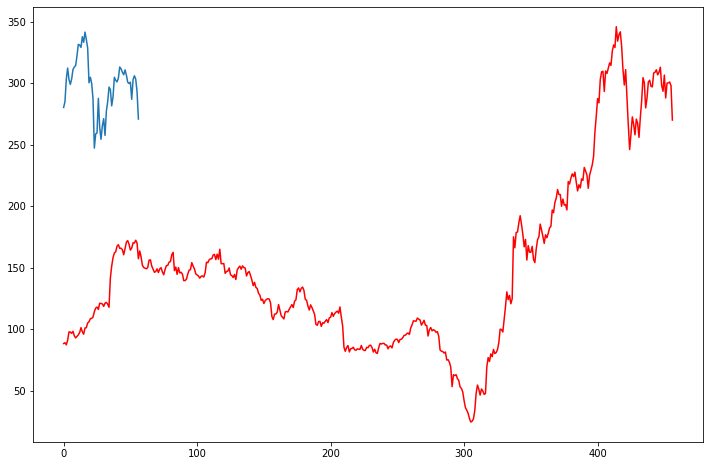

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(data_yh['Open'][0:680], color='r')
plt.plot(forecast['yhat'][0:680])


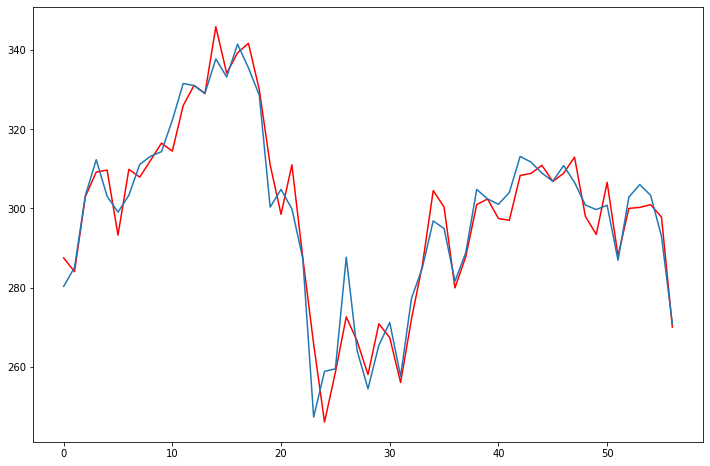

In [18]:
plt.figure(figsize=(12, 8))
plt.plot(df_test['y'], color='r')
plt.plot(forecast['yhat'])
# plt.plot(forecast['yhat_lower'])
# plt.plot(forecast['yhat_upper'])

In [62]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,close,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-09-17,91.976772,136.591357,137.802840,91.976772,91.976772,45.204672,45.204672,45.204672,-27.050514,...,5.529657,5.529657,5.529657,0.139604,0.139604,0.139604,0.0,0.0,0.0,137.181445
1,2019-09-18,91.980510,136.917997,138.135940,91.980510,91.980510,45.535102,45.535102,45.535102,-27.794669,...,5.474905,5.474905,5.474905,0.144431,0.144431,0.144431,0.0,0.0,0.0,137.515611
2,2019-09-19,91.984247,141.149322,142.389527,91.984247,91.984247,49.780811,49.780811,49.780811,-29.473951,...,5.454510,5.454510,5.454510,0.149562,0.149562,0.149562,0.0,0.0,0.0,141.765057
3,2019-09-20,91.987984,140.303876,141.560107,91.987984,91.987984,48.922642,48.922642,48.922642,-28.400526,...,5.489766,5.489766,5.489766,0.154874,0.154874,0.154874,0.0,0.0,0.0,140.910626
4,2019-09-23,91.999196,138.820129,140.032064,91.999196,91.999196,47.421319,47.421319,47.421319,-28.202961,...,5.486743,5.486743,5.486743,0.170374,0.170374,0.170374,0.0,0.0,0.0,139.420515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2019-12-20,92.328085,157.175035,158.388182,92.246221,92.410244,65.447742,65.447742,65.447742,-40.234514,...,5.489766,5.489766,5.489766,0.086408,0.086408,0.086408,0.0,0.0,0.0,157.775827
68,2019-12-23,92.339297,157.529977,158.819817,92.252613,92.425041,65.812154,65.812154,65.812154,-40.234514,...,5.486743,5.486743,5.486743,0.085270,0.085270,0.085270,0.0,0.0,0.0,158.151451
69,2019-12-24,92.343035,157.123909,158.375110,92.254573,92.429454,65.388343,65.388343,65.388343,-40.214759,...,5.529657,5.529657,5.529657,0.082210,0.082210,0.082210,0.0,0.0,0.0,157.731377
70,2019-12-26,92.350509,157.335203,158.619273,92.258767,92.439378,65.589672,65.589672,65.589672,-41.064272,...,5.454510,5.454510,5.454510,0.072775,0.072775,0.072775,0.0,0.0,0.0,157.940181


In [66]:
df_test=df_test.reset_index()